# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nicholson, Mr. Arthur Ernest",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
# TODO
print("\nMissing values :  ", titanic.isna().sum())


Missing values :   PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# TODO
titanic['Age']=titanic['Age'].replace(np.nan, round(np.mean(titanic['Age']),2))
titanic['Cabin']=titanic['Cabin'].replace(np.nan, 'Other')
titanic['Embarked']=titanic['Embarked'].replace(np.nan,(titanic['Embarked'].mode()[0]))


In [ ]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dependents     0
dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Other,S


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# TODO
titanic.sort_values('Fare',ascending=False,inplace=True)
titanic.reset_index(inplace=True)
titanic.loc[15,'Name']



'Farthing, Mr. John'

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)

### *** Answer 3: Farthing, Mr. John***

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# TODO
z=titanic.loc [(titanic['Sex']=='female'),:]
z.iloc[5,5]



'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### *** Answer 4: Baxter, Mrs. James (Helene DeLaudeniere Chaput) ***

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
# TODO
titanic.head()

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Other,C
1,2,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
2,1,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
3,3,88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
4,6,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
titanic.pivot_table('Survived','Sex')*100

,Survived
Sex,
female,74.203822
male,18.890815


In [ ]:
titanic.pivot_table('Survived','Pclass')*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [ ]:
titanic.pivot_table('Survived','Sex','Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### ***  Answer 5: Female from 1st and 2 nd class survived at much higher rate (90%+) compare to other classes. Male from 1st class survived (36.8%) much better than male of other classes. Survival rate of female is much higher than male ***

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

Text(0, 0.5, 'Density')

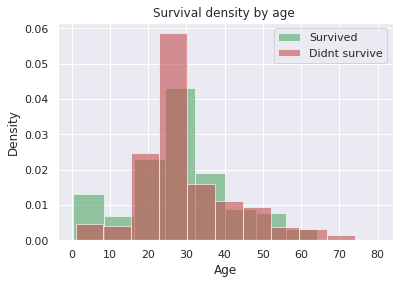

In [ ]:

ax0= plt.hist(titanic.loc[titanic['Survived']==1]['Age'], density=True, color='g', alpha=0.6, )
ax1= plt.hist(titanic.loc[titanic['Survived']==0]['Age'], density=True,color='r',alpha=0.6)
plt.legend(['Survived','Didn''t survive'])
plt.title("Survival density by age ")
plt.xlabel("Age")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

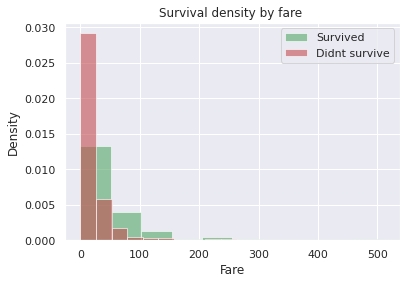

In [ ]:
ax0= plt.hist(titanic.loc[titanic['Survived']==1]['Fare'], density=True, color='g', alpha=0.6, )
ax1= plt.hist(titanic.loc[titanic['Survived']==0]['Fare'], density=True,color='r',alpha=0.6)
plt.legend(['Survived','Didn''t survive'])
plt.title("Survival density by fare ")
plt.xlabel("Fare")
plt.ylabel("Density")

### *** Answer 6: Age and Fare are important factor for once's survival. It is noted from the graphs that everyone who paid a ticket price of $200 and above survived and the survival rate of someone who paid lowest fare is much lower. Children survived much higher compared to perople of age 20-35 ***

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [ ]:
# TODO
x=pd.DataFrame(titanic, columns=['Survived','SibSp','Parch'])
x1= x.groupby(['Survived'], as_index=True).agg({'SibSp':'sum','Parch':'sum'})
x1

,SibSp,Parch
Survived,,
0,304,181
1,162,159


In [ ]:
x=titanic.pivot_table('Survived','SibSp')*100
y= titanic.pivot_table('Survived','Parch')*100

print(x)
print(y)

        Survived
SibSp           
0      34.539474
1      53.588517
2      46.428571
3      25.000000
4      16.666667
5       0.000000
8       0.000000
        Survived
Parch           
0      34.365782
1      55.084746
2      50.000000
3      60.000000
4       0.000000
5      20.000000
6       0.000000


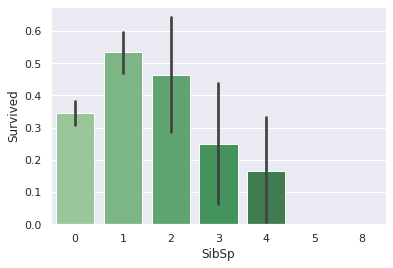

In [ ]:
sns.barplot("SibSp","Survived", palette ="Greens_d", data=titanic)
#Survival rate is higher for individuals with 0-2 siblings/spouses

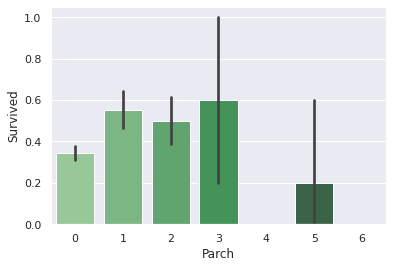

In [ ]:

sns.barplot("Parch","Survived", palette ="Greens_d", data=titanic)

#Survival rate is higher for individuals with 1-3 children


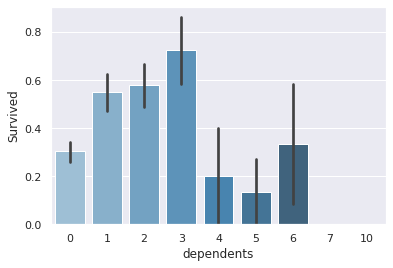

In [ ]:
titanic['dependents']=titanic['SibSp']+titanic['Parch']
titanic.dependents.unique()
sns.barplot("dependents","Survived", palette ="Blues_d", data=titanic)

#Survival rate is higher for individuals with 1-3 dependents (either siblings/spouse/ children)

### *** Answer 7: #Survival rate is higher for individuals with 1-3 dependents (either siblings/spouse/ children) ***

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Pclass,1.000000,0.131900,0.035446,0.015084,0.020758,0.663762,0.724119,-0.504189,0.305762,0.338481
Sex,0.131900,1.000000,0.058748,-0.138408,-0.243278,0.260048,0.265389,-0.051539,0.022521,0.543351
Age,0.035446,0.058748,1.000000,0.107813,0.082687,-0.058413,-0.011839,0.043793,-0.052320,0.011712
SibSp,0.015084,-0.138408,0.107813,1.000000,0.373933,-0.409374,-0.399539,-0.071513,0.000591,-0.043770
Parch,0.020758,-0.243278,0.082687,0.373933,1.000000,-0.349201,-0.340374,-0.054258,-0.038983,-0.091395
Ticket,0.663762,0.260048,-0.058413,-0.409374,-0.349201,1.000000,0.963018,-0.276554,0.267477,0.314038
Fare,0.724119,0.265389,-0.011839,-0.399539,-0.340374,0.963018,1.000000,-0.277309,0.289874,0.333943
Cabin,-0.504189,-0.051539,0.043793,-0.071513,-0.054258,-0.276554,-0.277309,1.000000,-0.116155,-0.218067
Embarked,0.305762,0.022521,-0.052320,0.000591,-0.038983,0.267477,0.289874,-0.116155,1.000000,0.125953
Survived,0.338481,0.543351,0.011712,-0.043770,-0.091395,0.314038,0.333943,-0.218067,0.125953,1.000000


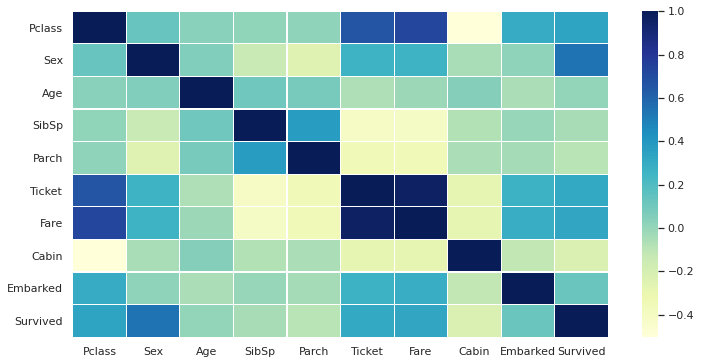

In [ ]:
# TODO
plt.figure(figsize=(12, 6))
corr = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

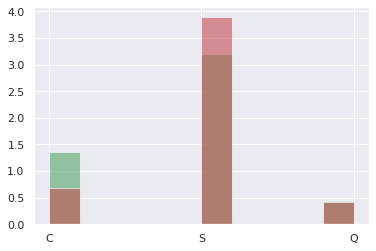

In [ ]:
# TODO

ax0= plt.hist(titanic.loc[titanic['Survived']==1]['Embarked'], density=True, color='g', alpha=0.6, )
ax1= plt.hist(titanic.loc[titanic['Survived']==0]['Embarked'], density= True, color='r',alpha=0.6)


In [ ]:
z=pd.DataFrame(titanic.pivot_table('Survived','Embarked'))

In [ ]:
feature=['Pclass','Sex']
for element in feature:
  m1=pd.DataFrame(titanic.groupby(['Embarked',""+element], as_index=True).agg({'Survived':np.ma.count}))
  print(m1)


                 Survived
Embarked Pclass          
C        1             85
         2             17
         3             66
Q        1              2
         2              3
         3             72
S        1            129
         2            164
         3            353
                 Survived
Embarked Sex             
C        female        73
         male          95
Q        female        36
         male          41
S        female       205
         male         441


In [ ]:
feature=['Pclass','Sex']
for element in feature:
  m1=pd.DataFrame(titanic.groupby(['Embarked',""+element], as_index=True).agg({'Survived':np.ma.count}))
  sre=m1.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
  print(sre)

                  Survived
Embarked Pclass           
C        1       50.595238
         2       10.119048
         3       39.285714
Q        1        2.597403
         2        3.896104
         3       93.506494
S        1       19.969040
         2       25.386997
         3       54.643963
                  Survived
Embarked Sex              
C        female  43.452381
         male    56.547619
Q        female  46.753247
         male    53.246753
S        female  31.733746
         male    68.266254


### *** Answer 9: It is observed that a person embarked at C has higher survival rate and those embarked at S has lower survival rate. Reasons could be: Twice the number of male has been embarked from S (100% higher than female) and 54% of those from S have booked 3rd class ticket and 68% of those from S are male and hence lower survival rate. C has higher survival rate as 50% of them had booked 1st class. Also 43% of those who came from C are female. ***

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [ ]:
# TODO
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dependents
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Other,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Other,S,0


In [ ]:
titml= pd.DataFrame(titanic, columns=[ 'Survived', 'Pclass', 'Sex', 'Age', 'dependents',
       'Fare', 'Embarked'])
titml.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
dependents    0
Fare          0
Embarked      0
dtype: int64

In [ ]:
titml.nunique()

Survived        2
Pclass          3
Sex             2
Age            89
dependents      9
Fare          248
Embarked        3
dtype: int64

In [ ]:
titml.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
dependents      int64
Fare          float64
Embarked       object
dtype: object

In [ ]:
titml1=pd.get_dummies(titml,columns=['Sex','Embarked','Pclass'])

In [ ]:
titml1.head()


,Survived,Age,dependents,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
index=['Age', 'dependents', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Pclass_1','Pclass_2','Pclass_3']
titmlx= titml1.loc[:, index]
titmly=titml1.loc[:,['Survived']]

In [ ]:
titmlx.head()

,Age,dependents,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid= \
train_test_split(titmlx,titmly, test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.intercept_

array([0.52150417])

In [ ]:
model.coef_

array([[-0.02832979, -0.22477836,  0.00395562,  1.58676484, -1.06526067,
         0.39734606,  0.2096638 , -0.08550569,  0.88838166,  0.42194401,
        -0.78882149]])

In [ ]:
y_pred=model.predict(x_valid)

In [ ]:
model.score(titmlx,titmly)

0.8047138047138047

In [ ]:
confusion_matrix(y_valid, y_pred)

array([[90, 15],
       [21, 53]])

In [ ]:
classification_report(y_valid, model.predict(x_valid))

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       105\n           1       0.78      0.72      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_valid)*100

79.88826815642457

In [ ]:
predict= pd.read_csv('https://raw.githubusercontent.com/jessiececilya/ML-Data/main/titanic/test.csv')

In [ ]:
predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
predict['Age']=predict['Age'].replace(np.nan, round(np.mean(titmlx['Age']),2))
predict['Cabin']=predict['Cabin'].replace(np.nan, 'Other')
predict['Fare']=predict['Fare'].replace(np.nan, round(np.mean(titmlx['Fare']),2))
predict['dependents']=predict['SibSp']+predict['Parch']

In [ ]:
predict.isna().sum()

PassengerId    0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dependents     0
dtype: int64

In [ ]:
predict=pd.get_dummies(predict,columns=['Sex','Embarked','Pclass'])

KeyError: ignored

In [ ]:
predict['dependents']=predict['SibSp']+predict['Parch']

In [ ]:
predictx= predict.loc[:, index]


In [ ]:
predictx.head()

,Age,dependents,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,2,12.2875,1,0,0,0,1,0,0,1


In [ ]:
predicty= model.predict(predictx)

In [ ]:

len(np.arange(892,891+419,1))

418

In [ ]:
out =pd.DataFrame({
    'PassengerId' : np.arange(892,891+419,1).tolist(), 
    'Survived': predicty.tolist()
})

In [ ]:
from google.colab import files
out.to_csv('Output4.csv',index=False)
files.download('Output4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

predictx.isna().sum()

Age           86
dependents     0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

### *** Answer 10: On checking the test data in Kaggle my accuracy came out to be 76.55% 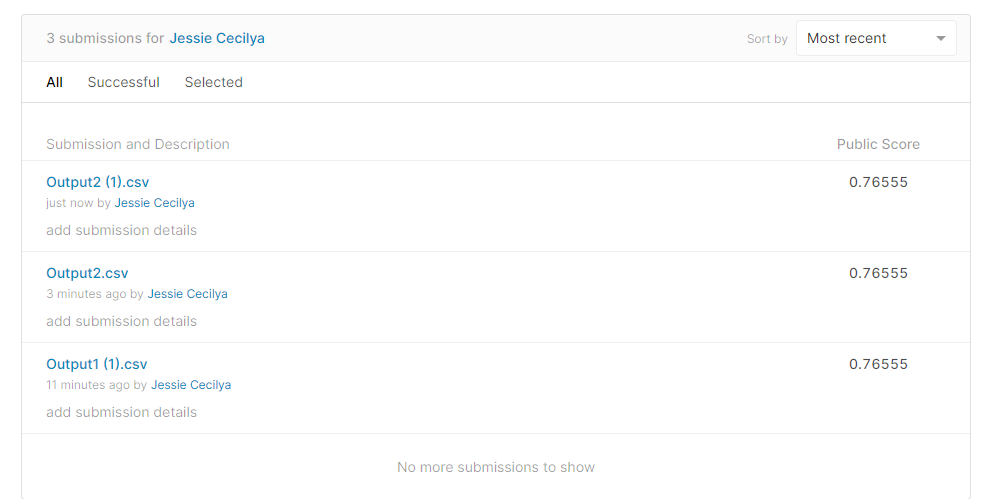